DATA LOADING

In [125]:
import numpy as np 
import pandas as pd
df=pd.read_csv("H.csv")

In [126]:
df

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4.0,2.0,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4.0,4.0,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3.0,2.0,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4.0,2.0,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4.0,1.0,2,yes,yes,yes,no,yes,2,no,furnished,11410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2.0,1.0,1,yes,no,yes,no,no,2,no,unfurnished,1820000
541,2400,3.0,1.0,1,no,no,no,no,no,0,no,semi-furnished,1767150
542,3620,2.0,NaN,1,yes,no,no,no,no,0,no,unfurnished,1750000
543,2910,3.0,1.0,1,no,no,no,no,no,0,no,furnished,1750000


In [127]:
df.head()


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4.0,2.0,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4.0,4.0,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3.0,2.0,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4.0,2.0,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4.0,1.0,2,yes,yes,yes,no,yes,2,no,furnished,11410000


In [128]:
# Display dataset information to understand its structure
print("\nDataset Information:")
print(df.info())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area              545 non-null    int64  
 1   bedrooms          529 non-null    float64
 2   bathrooms         527 non-null    float64
 3   stories           545 non-null    int64  
 4   mainroad          545 non-null    object 
 5   guestroom         545 non-null    object 
 6   basement          536 non-null    object 
 7   hotwaterheating   525 non-null    object 
 8   airconditioning   545 non-null    object 
 9   parking           545 non-null    int64  
 10  prefarea          545 non-null    object 
 11  furnishingstatus  545 non-null    object 
 12  price             545 non-null    int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 55.5+ KB
None


In [129]:
# Display summary statistics to understand the numerical features
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
               area    bedrooms   bathrooms     stories     parking  \
count    545.000000  529.000000  527.000000  545.000000  545.000000   
mean    5150.541284    2.964083    1.290323    1.805505    0.693578   
std     2170.141023    0.736389    0.505823    0.867492    0.861586   
min     1650.000000    1.000000    1.000000    1.000000    0.000000   
25%     3600.000000    2.000000    1.000000    1.000000    0.000000   
50%     4600.000000    3.000000    1.000000    2.000000    0.000000   
75%     6360.000000    3.000000    2.000000    2.000000    1.000000   
max    16200.000000    6.000000    4.000000    4.000000    3.000000   

              price  
count  5.450000e+02  
mean   4.766729e+06  
std    1.870440e+06  
min    1.750000e+06  
25%    3.430000e+06  
50%    4.340000e+06  
75%    5.740000e+06  
max    1.330000e+07  


DATA ANALYSIS AND PREPROCESSING

In [130]:
# Import necessary libraries for data analysis and visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
# Check feature types (numerical, categorical)
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

In [132]:
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

# Check for missing values and handle them if necessary
print("\nMissing Values:")
print(df.isnull().sum())

Numerical Features: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
Categorical Features: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

Missing Values:
area                 0
bedrooms            16
bathrooms           18
stories              0
mainroad             0
guestroom            0
basement             9
hotwaterheating     20
airconditioning      0
parking              0
prefarea             0
furnishingstatus     0
price                0
dtype: int64


In [133]:
# Handling missing values
# For numerical features, using median to avoid outlier influence
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())

# For categorical features, using mode to fill missing values
df[categorical_features] = df[categorical_features].fillna(df[categorical_features].mode().iloc[0])

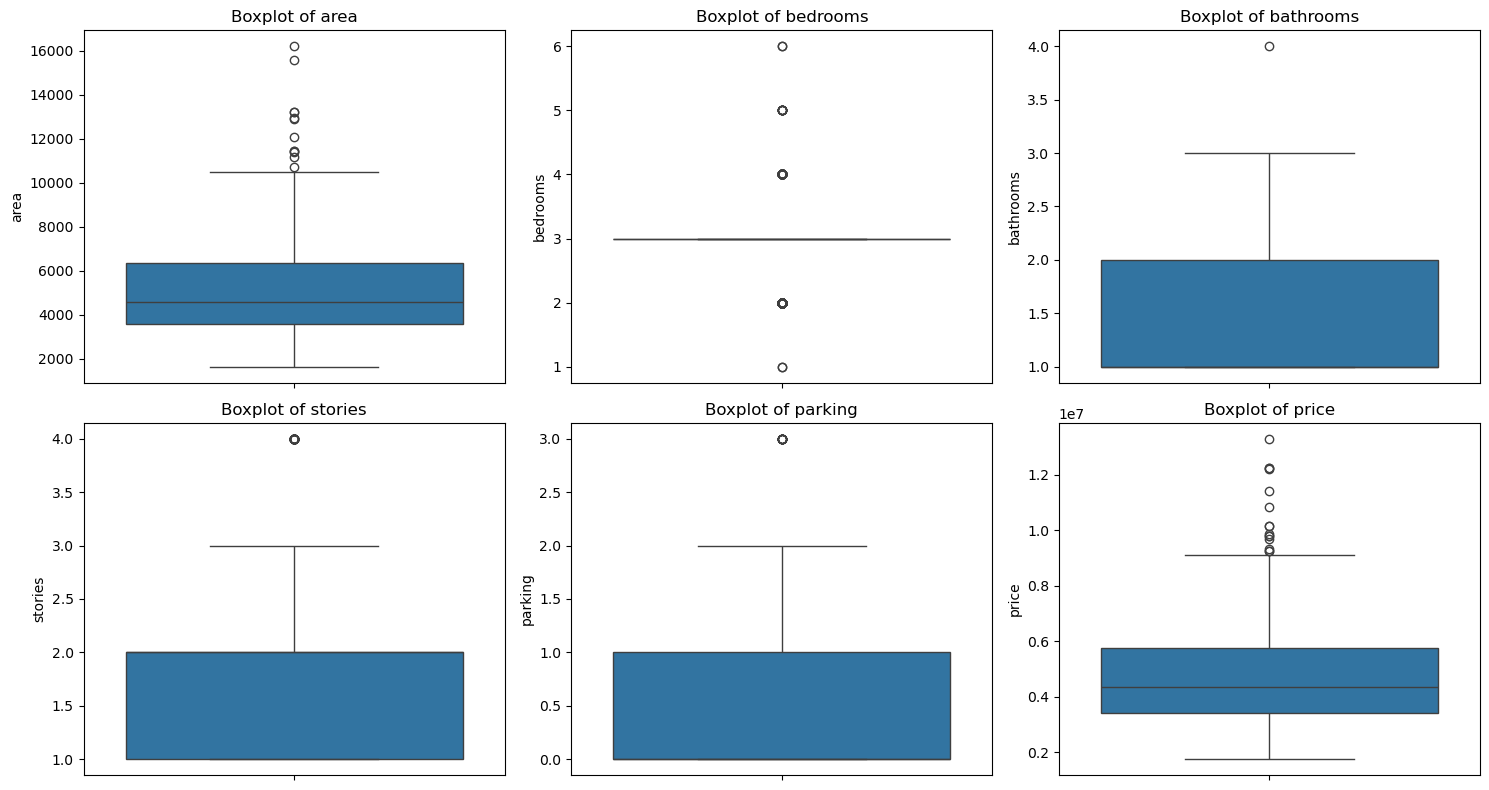

In [134]:
# Analyze the dataset for outliers using boxplots for numerical features
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_features):
    plt.subplot(2, len(numerical_features) // 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


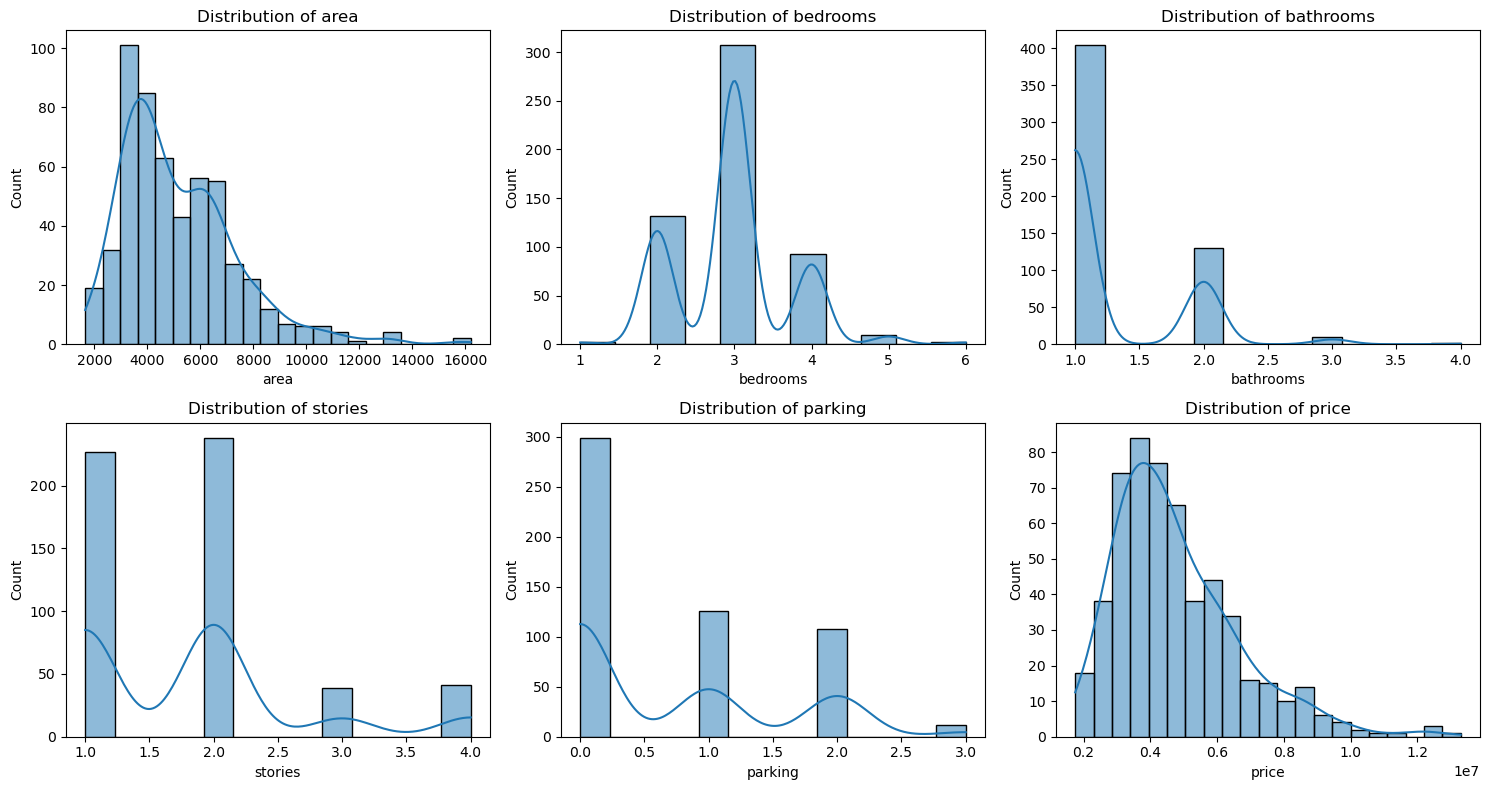

In [135]:
# Visualize distributions of numerical features
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_features):
    plt.subplot(2, len(numerical_features) // 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [136]:
# Outlier Removal using IQR (Interquartile Range) method
def remove_outliers(df, numerical_columns):
    for col in numerical_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Removing outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [137]:
# Applying the function to remove outliers
# List of columns where outliers should be removed
columns_to_remove_outliers = ['area', 'price', 'stories', 'parking']
housing_data = remove_outliers(df, columns_to_remove_outliers)

# Checking the dataset after outlier removal
print("\nDataset after outlier removal:")
print(housing_data.describe())


Dataset after outlier removal:
               area    bedrooms   bathrooms     stories     parking  \
count    472.000000  472.000000  472.000000  472.000000  472.000000   
mean    4764.709746    2.908898    1.222458    1.622881    0.584746   
std     1802.630520    0.727212    0.445887    0.626507    0.774611   
min     1650.000000    1.000000    1.000000    1.000000    0.000000   
25%     3480.000000    2.000000    1.000000    1.000000    0.000000   
50%     4300.000000    3.000000    1.000000    2.000000    0.000000   
75%     6000.000000    3.000000    1.000000    2.000000    1.000000   
max    10500.000000    6.000000    3.000000    3.000000    2.000000   

              price  
count  4.720000e+02  
mean   4.373888e+06  
std    1.453198e+06  
min    1.750000e+06  
25%    3.358250e+06  
50%    4.200000e+06  
75%    5.244750e+06  
max    8.890000e+06  


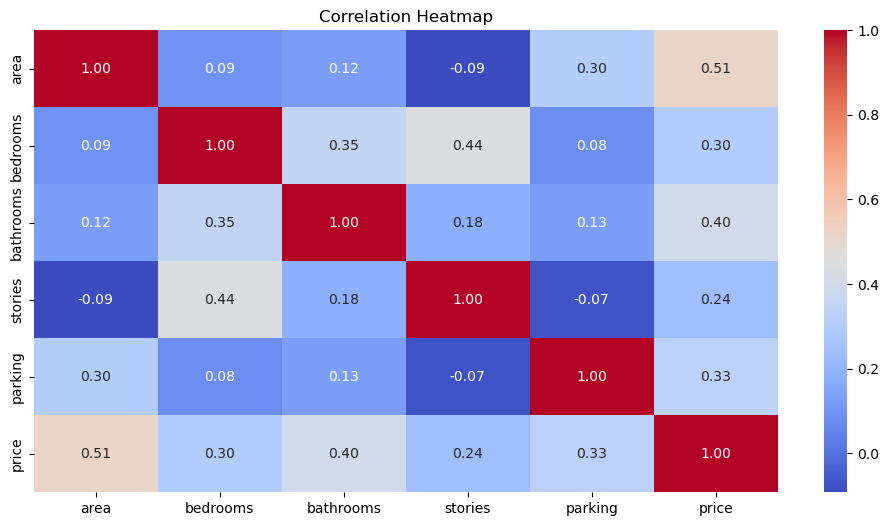

In [138]:
# Correlation heatmap to understand relationships between numerical features
plt.figure(figsize=(12, 6))
sns.heatmap(housing_data[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [139]:
# Encoding categorical features using One-Hot Encoding
housing_data_encoded = pd.get_dummies(housing_data, columns=categorical_features, drop_first=True)

In [140]:
# Feature Engineering - (create a new feature)
housing_data_encoded['area_per_bedroom'] = housing_data_encoded['area'] / housing_data_encoded['bedrooms']

In [141]:
print("\nData after encoding categorical features:")
print(housing_data_encoded.head())


Data after encoding categorical features:
    area  bedrooms  bathrooms  stories  parking    price  mainroad_yes  \
18  4600       3.0        2.0        2        2  8890000          True   
19  6420       3.0        2.0        2        1  8855000          True   
20  4320       3.0        1.0        2        2  8750000          True   
21  7155       3.0        2.0        1        2  8680000          True   
22  8050       3.0        1.0        1        1  8645000          True   

    guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
18           True         False                False                 True   
19          False         False                False                 True   
20          False          True                 True                False   
21           True          True                False                 True   
22           True          True                False                 True   

    prefarea_yes  furnishingstatus_semi-furnished

In [142]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features_to_scale = ['bedrooms', 'bathrooms', 'stories', 'parking']
housing_data_encoded[numerical_features_to_scale] = scaler.fit_transform(housing_data_encoded[numerical_features_to_scale])

# Log transform of the target variable (price)
housing_data_encoded['log_area'] = np.log(housing_data_encoded['area'])

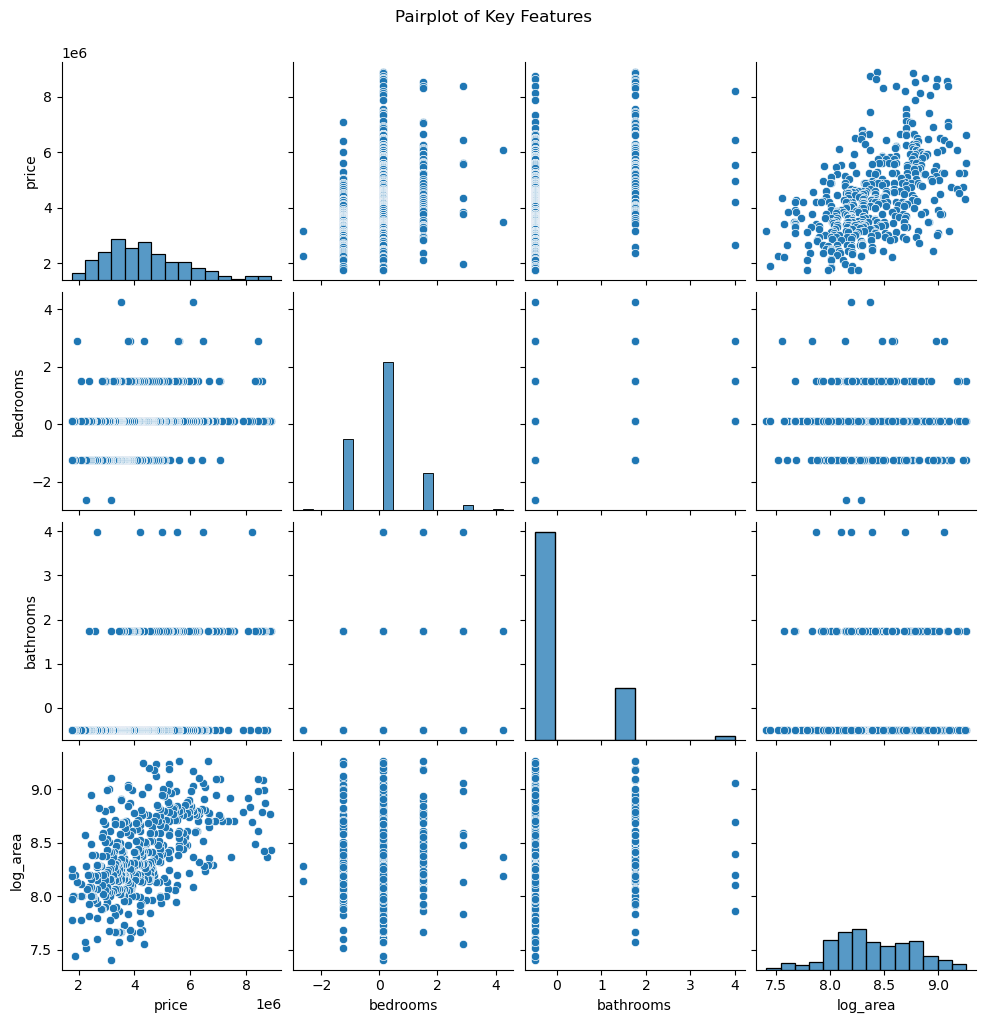

In [143]:
# Pairplot to visualize relationships between features
sns.pairplot(housing_data_encoded[['price', 'bedrooms', 'bathrooms', 'log_area']])
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

TRAINING AND TESTING

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [145]:
# Separate the features and the target variable
X = housing_data_encoded.drop(['price'], axis=1)
y = housing_data_encoded['price']

In [146]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

MODEL

In [147]:
# Define base models
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

In [148]:
# Meta-model
meta_model = LinearRegression()

In [149]:
# Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=[
        ('random_forest', model_rf),
        ('gradient_boosting', model_gb),
        ('xgboost', model_xgb)
    ],
    final_estimator=meta_model
)

In [150]:
# Train the model
stacking_regressor.fit(X_train, y_train)

StackingRegressor(estimators=[('random_forest',
                               RandomForestRegressor(random_state=42)),
                              ('gradient_boosting',
                               GradientBoostingRegressor(random_state=42)),
                              ('xgboost',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                  final_estimator=LinearRegression())

In [151]:
# Make predictions
y_pred = stacking_regressor.predict(X_test)

RESULT

In [152]:
#Calculates the Median Absolute Percentage Error (MdAPE)
def median_ape(y_true, y_pred):
  ape = np.abs((y_true - y_pred) / y_true) * 100
  return np.median(ape)

In [153]:
# Assuming you have corrected the data splitting and prediction issues

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = stacking_regressor.predict(X_test) 

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mdape = median_ape(y_test, y_pred)


print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")
print(f"Median Absolute Percentage Error: {mdape:.2f}%")

MAE: 819192.1847990712
MSE: 1113825148546.4316
R-squared: 0.5698980021121032
Median Absolute Percentage Error: 15.27%


In [154]:
accuracy_mdape=100 - mdape
print(f"ACCURACY: {accuracy_mdape:.2f}%")

ACCURACY: 84.73%


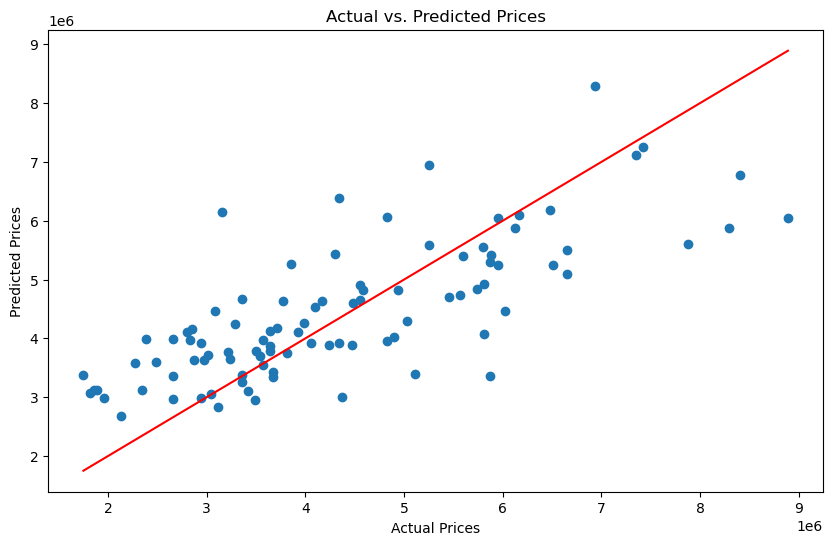

In [155]:
# Visualize the results: Actual vs. Predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-')  # Line of perfect prediction
plt.show()